# Deriving coefficients for the implicit scheme
---------------------------------------------------

The ice sheet energy balance model uses an implicit scheme to solve the
heat equation for $N$ layers. It uses the Crank-Nicholson scheme to discretise
the equations. For an equation in one space dimension $x$

$\frac{df}{dt} = F$,

the Crank-Nicholson scheme discretises the equation as

$\frac{f^{i+1}_x - f^{i}_x}{\Delta t} = 0.5\left [ F^{i+1}_x + F^{i}_x \right ]$

where the superscript is time and the subscript is space.

In [4]:
from sympy import *
init_printing()

In [141]:
tnew_x = Symbol('T^{i+1}_x')
tnew_xprev = Symbol('T^{i+1}_{x-1}')
tnew_xafter = Symbol('T^{i+1}_{x+1}')

told_x = Symbol('T^{i}_x')
told_xprev = Symbol('T^{i}_{x-1}')
told_xafter = Symbol('T^{i}_{x+1}')

u_x = Symbol('\kappa_x')
u_xprev = Symbol('\kappa_{x-1}')
u_xafter = Symbol('\kappa_{x+1}')

delta_t = Symbol('\Delta t')
delta_x = Symbol('\Delta x')

In [142]:
told_x, u_xprev, tnew_xafter, delta_x

In [143]:
lhs = (tnew_x - told_x)/delta_t

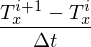

In [144]:
lhs # The time derivative

In [158]:
rhs_new = 0.5*(u_x*(tnew_xprev - 2*tnew_x + tnew_xafter)/delta_x**2 + 
               ((tnew_x - tnew_xprev)/(delta_x))*((u_x - u_xprev)/(delta_x)))

In [159]:
rhs_old = 0.5*(u_x*(told_xprev - 2*told_x + told_xafter)/delta_x**2 + 
               ((told_x - told_xprev)/(delta_x))*((u_x - u_xprev)/(delta_x)))

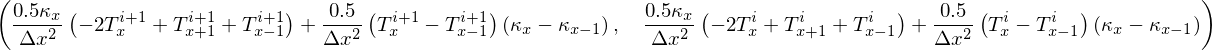

In [160]:
rhs_new, rhs_old # The two parts of the crank-nicholson RHS.

In [161]:
expr = lhs - rhs_new - rhs_old

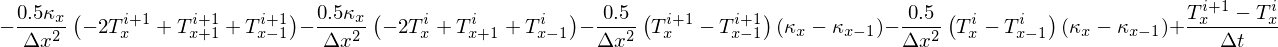

In [162]:
expr

In [163]:
poly_form = Poly(expr, tnew_x, tnew_xafter, tnew_xprev, told_x, told_xafter, told_xprev)

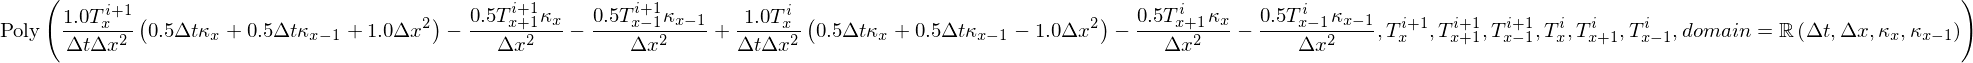

In [167]:
poly_form

The coefficients for the $i+1$ temperature (predicted) are

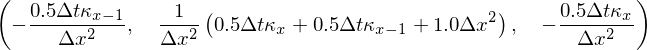

In [165]:
(poly_form.coeff_monomial(tnew_xprev)*delta_t).simplify(), (poly_form.coeff_monomial(tnew_x)*delta_t).simplify(), (poly_form.coeff_monomial(tnew_xafter)*delta_t).simplify()

The coefficients for the $i$ temperature (current) are

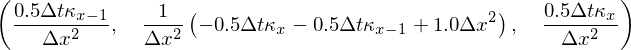

In [166]:
-(poly_form.coeff_monomial(told_xprev)*delta_t).simplify(), (poly_form.coeff_monomial(told_x)*-delta_t).simplify(), -(poly_form.coeff_monomial(told_xafter)*delta_t).simplify()

These are the coefficients for the diagonals of the sparse matrix. The need to be multiplied by $\frac{1}{\rho C}$ where $\rho, C$ are the vertically varying density and specific heat to represent snow and ice. 

The $\kappa$ values are staggered from the $T$ values, since $T$ represents the interface temperatures and $\kappa$ represents the mid_level values. `K_mid` and `K_bar` in the code therefore interpolate $\kappa$ values to the interface.